<a href="https://colab.research.google.com/github/shafiqulrehman/AlzheimerCode/blob/main/DARWIN_top_K_Features_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this code we are trying to select the classifier specific top-k features**

For the set of classifiers ET, RF, XGB and LR we are employig Recursive Feature Elimination(RFE)

For the set of classifiers SVM, GNB and MLP we are employig ANOVA(selectTopK function)



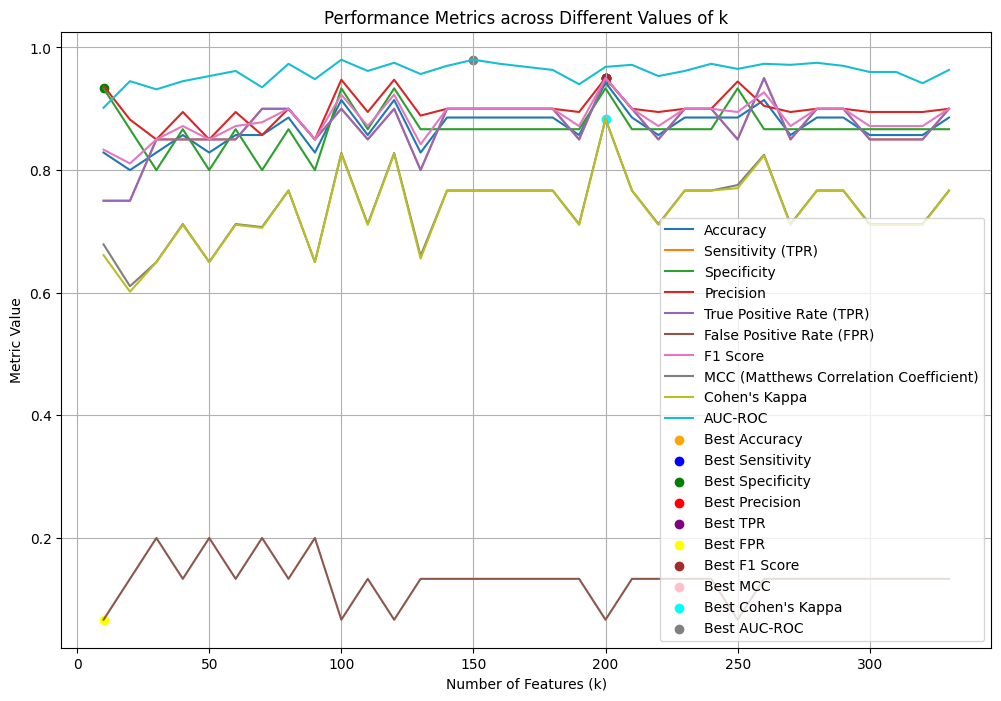

Best Accuracy (k=200): 0.9428571428571428
Best Sensitivity (TPR) (k=200): 0.95
Best Specificity (k=10): 0.9333333333333333
Best Precision (k=200): 0.95
Best TPR (k=200): 0.95
Best FPR (k=10): 0.06666666666666667
Best F1 Score (k=200): 0.9500000000000001
Best MCC (k=200): 0.8833333333333333
Best Cohen's Kappa (k=200): 0.8833333333333333
Best AUC-ROC (k=150): 0.9800000000000001


In [ ]:
############# Extra Tree classifiers #############
############# RFE   ##############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Perform grid search for k values
min_k = 10
max_k = 338  # Adjusted to the number of features in your dataset
step = 10

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

for k in range(min_k, max_k + 1, step):
    # Apply Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=et_classifier, n_features_to_select=k)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # Train the Extra Trees classifier using the selected features
    et_classifier.fit(X_train_rfe, y_train)

    # Apply the same feature selection to the test set
    X_test_rfe = rfe.transform(X_test)

    # Make predictions on the test set
    y_pred = et_classifier.predict(X_test_rfe)
    y_prob = et_classifier.predict_proba(X_test_rfe)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


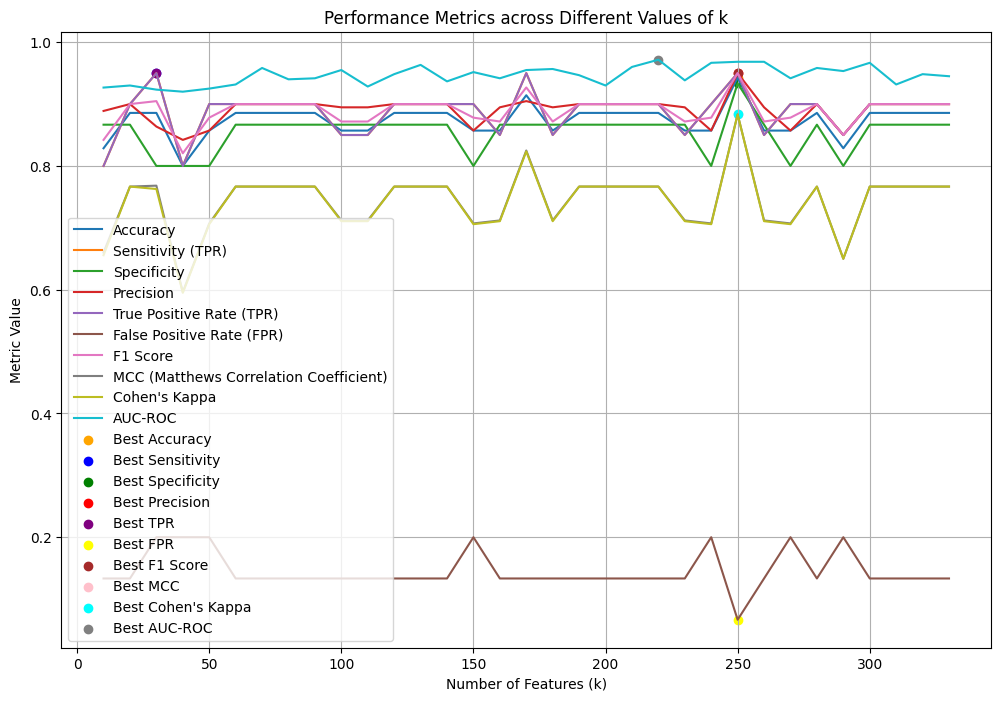

Best Accuracy (k=250): 0.9428571428571428
Best Sensitivity (TPR) (k=30): 0.95
Best Specificity (k=250): 0.9333333333333333
Best Precision (k=250): 0.95
Best TPR (k=30): 0.95
Best FPR (k=250): 0.06666666666666667
Best F1 Score (k=250): 0.9500000000000001
Best MCC (k=250): 0.8833333333333333
Best Cohen's Kappa (k=250): 0.8833333333333333
Best AUC-ROC (k=220): 0.9716666666666667


In [ ]:
############# Random Forest classifiers #############
############# REF #####################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search for k values
min_k = 10
max_k = 338  # Adjusted to the number of features in your dataset
step = 10

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

for k in range(min_k, max_k + 1, step):
    # Apply Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=rf_classifier, n_features_to_select=k)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # Train the Random Forest classifier using the selected features
    rf_classifier.fit(X_train_rfe, y_train)

    # Apply the same feature selection to the test set
    X_test_rfe = rfe.transform(X_test)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test_rfe)
    y_prob = rf_classifier.predict_proba(X_test_rfe)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")



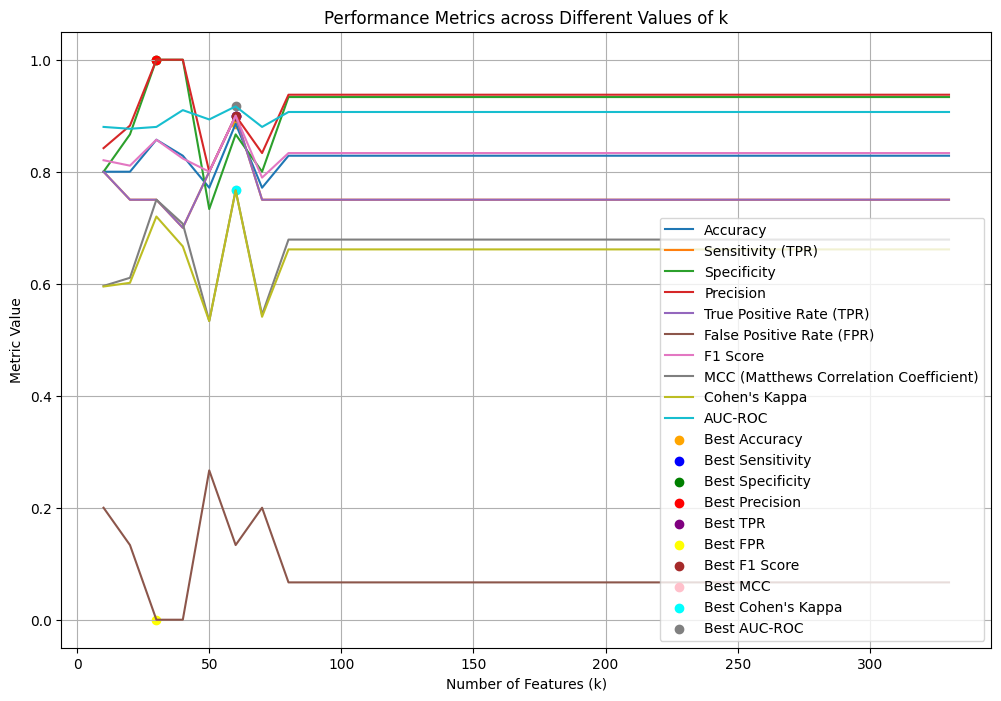

Best Accuracy (k=60): 0.8857142857142857
Best Sensitivity (TPR) (k=60): 0.9
Best Specificity (k=30): 1.0
Best Precision (k=30): 1.0
Best TPR (k=60): 0.9
Best FPR (k=30): 0.0
Best F1 Score (k=60): 0.9
Best MCC (k=60): 0.7666666666666667
Best Cohen's Kappa (k=60): 0.7666666666666666
Best AUC-ROC (k=60): 0.9166666666666667


In [ ]:
############# XGBoost classifiers #############
##############  RFE   ##############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBClassifier from xgboost
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)  # Use XGBClassifier instead of RandomForestClassifier

# Perform grid search for k values
min_k = 10
max_k = 338  # Adjusted to the number of features in your dataset
step = 10

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

for k in range(min_k, max_k + 1, step):
    # Apply Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=xgb_classifier, n_features_to_select=k)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # Train the XGBoost classifier using the selected features
    xgb_classifier.fit(X_train_rfe, y_train)

    # Apply the same feature selection to the test set
    X_test_rfe = rfe.transform(X_test)

    # Make predictions on the test set
    y_pred = xgb_classifier.predict(X_test_rfe)
    y_prob = xgb_classifier.predict_proba(X_test_rfe)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


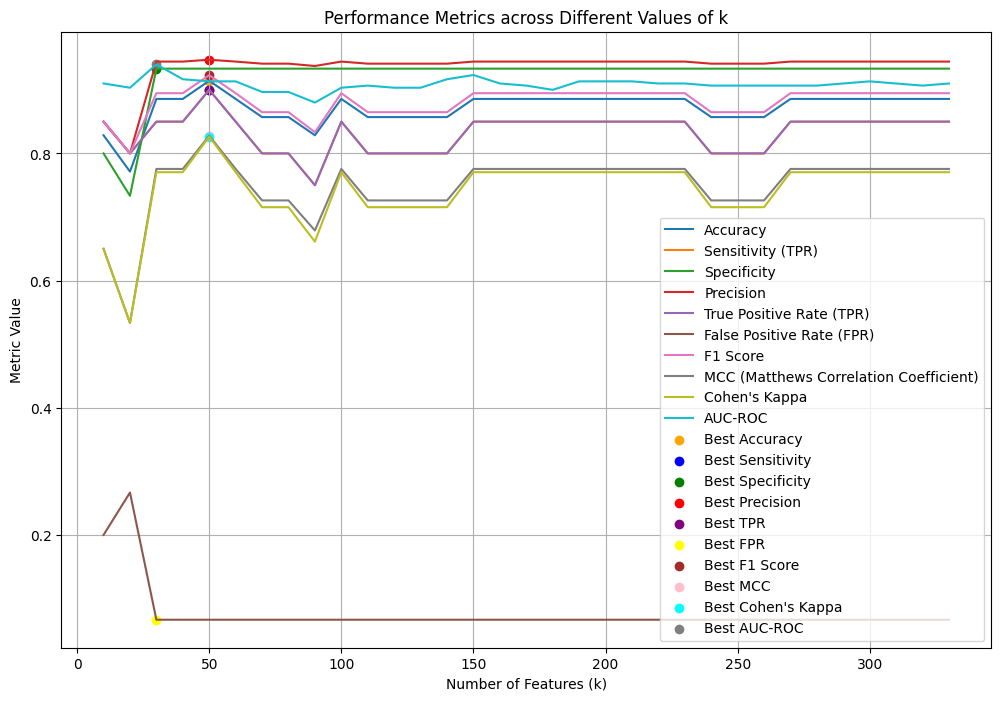

Best Accuracy (k=50): 0.9142857142857143
Best Sensitivity (TPR) (k=50): 0.9
Best Specificity (k=30): 0.9333333333333333
Best Precision (k=50): 0.9473684210526315
Best TPR (k=50): 0.9
Best FPR (k=30): 0.06666666666666667
Best F1 Score (k=50): 0.9230769230769231
Best MCC (k=50): 0.8278327231656525
Best Cohen's Kappa (k=50): 0.8264462809917356
Best AUC-ROC (k=30): 0.94


In [ ]:
############# Logistic Regression #############
#############  REF  ##################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Perform grid search for k values
min_k = 10
max_k = X.shape[1]  # Use the total number of features in your dataset
step = 10

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

for k in range(min_k, max_k + 1, step):
    # Apply Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=lr_classifier, n_features_to_select=k)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # Train the Logistic Regression classifier using the selected features
    lr_classifier.fit(X_train_rfe, y_train)

    # Apply the same feature selection to the test set
    X_test_rfe = rfe.transform(X_test)

    # Make predictions on the test set
    y_pred = lr_classifier.predict(X_test_rfe)
    y_prob = lr_classifier.predict_proba(X_test_rfe)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


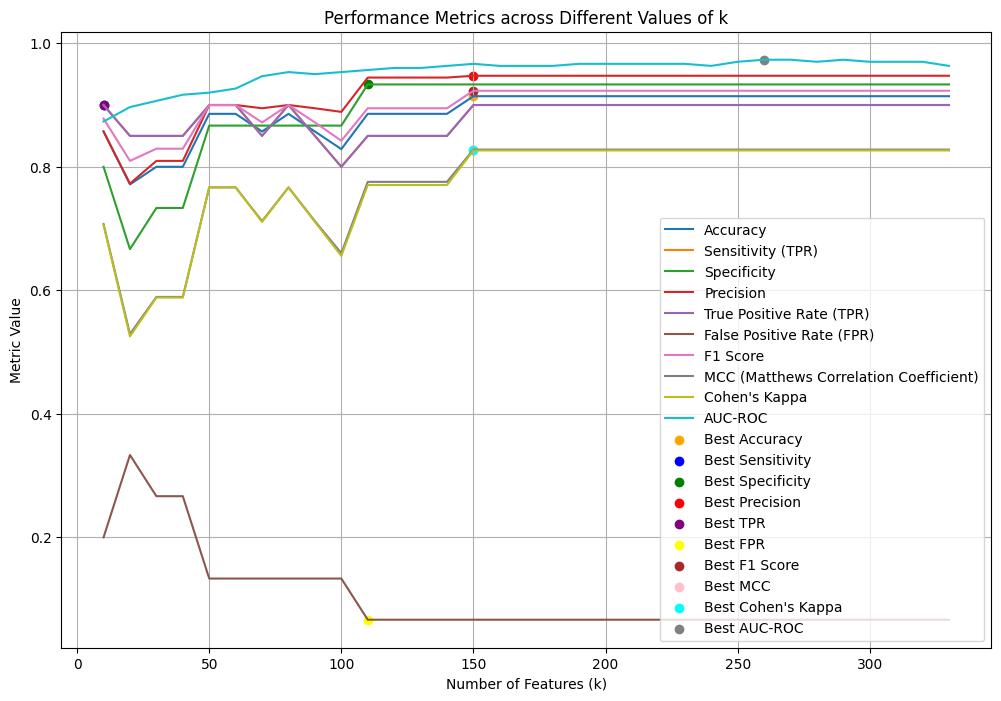

Best Accuracy (k=150): 0.9142857142857143
Best Sensitivity (TPR) (k=10): 0.9
Best Specificity (k=110): 0.9333333333333333
Best Precision (k=150): 0.9473684210526315
Best TPR (k=10): 0.9
Best FPR (k=110): 0.06666666666666667
Best F1 Score (k=150): 0.9230769230769231
Best MCC (k=150): 0.8278327231656525
Best Cohen's Kappa (k=150): 0.8264462809917356
Best AUC-ROC (k=260): 0.9733333333333334


In [ ]:
############# Support Vector Machine (SVM) with SelectKBest #############
############## ANOVA #######################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine classifier
svm_classifier = SVC(probability=True)

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

# Iterate over different values of k
for k in range(10, 339, 10):
    # Apply SelectKBest feature selection
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train, y_train)
    X_test_selected = k_best_selector.transform(X_test)

    # Train the Support Vector Machine classifier using the selected features
    svm_classifier.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test_selected)
    y_prob = svm_classifier.predict_proba(X_test_selected)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


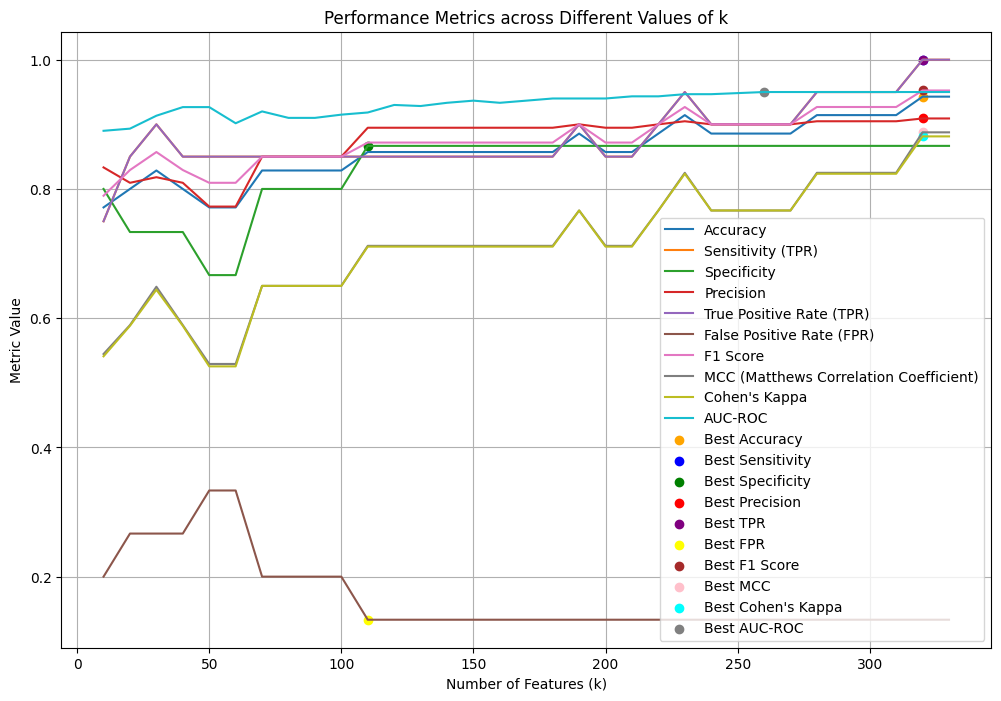

Best Accuracy (k=320): 0.9428571428571428
Best Sensitivity (TPR) (k=320): 1.0
Best Specificity (k=110): 0.8666666666666667
Best Precision (k=320): 0.9090909090909091
Best TPR (k=320): 1.0
Best FPR (k=110): 0.13333333333333333
Best F1 Score (k=320): 0.9523809523809523
Best MCC (k=320): 0.8876253645985946
Best Cohen's Kappa (k=320): 0.8813559322033898
Best AUC-ROC (k=260): 0.9500000000000001


In [ ]:
############# Gaussian Naive Bayes with SelectKBest #############
############# ANOVA ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

# Iterate over different values of k
for k in range(10, 339, 10):
    # Apply SelectKBest feature selection
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train, y_train)
    X_test_selected = k_best_selector.transform(X_test)

    # Train the Gaussian Naive Bayes classifier using the selected features
    gnb_classifier.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = gnb_classifier.predict(X_test_selected)
    y_prob = gnb_classifier.predict_proba(X_test_selected)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

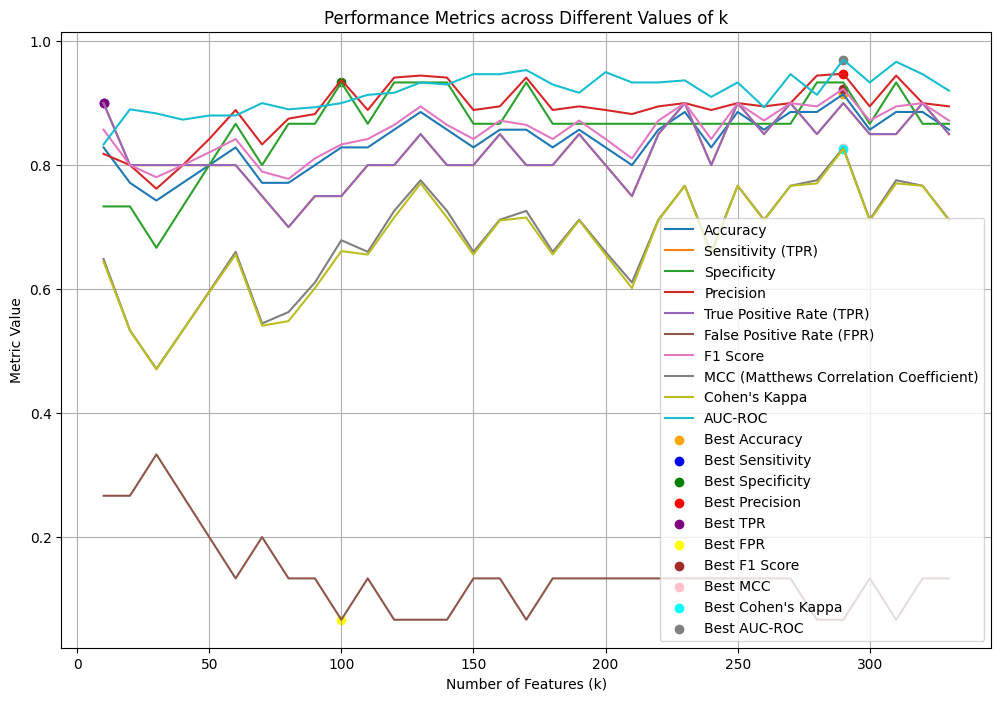

Best Accuracy (k=290): 0.9142857142857143
Best Sensitivity (TPR) (k=10): 0.9
Best Specificity (k=100): 0.9333333333333333
Best Precision (k=290): 0.9473684210526315
Best TPR (k=10): 0.9
Best FPR (k=100): 0.06666666666666667
Best F1 Score (k=290): 0.9230769230769231
Best MCC (k=290): 0.8278327231656525
Best Cohen's Kappa (k=290): 0.8264462809917356
Best AUC-ROC (k=290): 0.97


In [ ]:
############# Multi-Layer Perceptron (MLP) with SelectKBest #############
############## ANOVA #######################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, f1_score, matthews_corrcoef, cohen_kappa_score
)

# Load the dataset (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert class labels ('H' and 'P') to numerical values if necessary
# Example: If 'H' is 0 and 'P' is 1
y = y.map({'H': 0, 'P': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multi-Layer Perceptron classifier
mlp_classifier = MLPClassifier(random_state=42)

# Initialize lists to store metric values and corresponding indices
k_values = []
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []
tpr_values = []
fpr_values = []
f1_values = []
mcc_values = []
cohen_kappa_values = []
auc_roc_values = []

# Iterate over different values of k
for k in range(10, 339, 10):
    # Apply SelectKBest feature selection
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train, y_train)
    X_test_selected = k_best_selector.transform(X_test)

    # Train the Multi-Layer Perceptron classifier using the selected features
    mlp_classifier.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = mlp_classifier.predict(X_test_selected)
    y_prob = mlp_classifier.predict_proba(X_test_selected)[:, 1]

    # Calculate and append metric values for each value of k
    k_values.append(k)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    sensitivity_values.append(recall_score(y_test, y_pred))

    # Calculate specificity using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_values.append(tn / (tn + fp))

    precision_values.append(precision_score(y_test, y_pred))
    tpr_values.append(recall_score(y_test, y_pred))
    fpr_values.append(fp / (tn + fp))
    f1_values.append(f1_score(y_test, y_pred))
    mcc_values.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_values.append(cohen_kappa_score(y_test, y_pred))
    auc_roc_values.append(roc_auc_score(y_test, y_prob))

# Find the indices for best values
best_accuracy_index = np.argmax(accuracy_values)
best_sensitivity_index = np.argmax(sensitivity_values)
best_specificity_index = np.argmax(specificity_values)
best_precision_index = np.argmax(precision_values)
best_tpr_index = np.argmax(tpr_values)
best_fpr_index = np.argmin(fpr_values)
best_f1_index = np.argmax(f1_values)
best_mcc_index = np.argmax(mcc_values)
best_cohen_kappa_index = np.argmax(cohen_kappa_values)
best_auc_roc_index = np.argmax(auc_roc_values)

# Plot the metrics across different values of k
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy')
plt.plot(k_values, sensitivity_values, label='Sensitivity (TPR)')
plt.plot(k_values, specificity_values, label='Specificity')
plt.plot(k_values, precision_values, label='Precision')
plt.plot(k_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(k_values, fpr_values, label='False Positive Rate (FPR)')
plt.plot(k_values, f1_values, label='F1 Score')
plt.plot(k_values, mcc_values, label='MCC (Matthews Correlation Coefficient)')
plt.plot(k_values, cohen_kappa_values, label="Cohen's Kappa")
plt.plot(k_values, auc_roc_values, label='AUC-ROC')

# Mark the points on the plot
plt.scatter(k_values[best_accuracy_index], accuracy_values[best_accuracy_index], marker='o', color='orange', label='Best Accuracy')
plt.scatter(k_values[best_sensitivity_index], sensitivity_values[best_sensitivity_index], marker='o', color='blue', label='Best Sensitivity')
plt.scatter(k_values[best_specificity_index], specificity_values[best_specificity_index], marker='o', color='green', label='Best Specificity')
plt.scatter(k_values[best_precision_index], precision_values[best_precision_index], marker='o', color='red', label='Best Precision')
plt.scatter(k_values[best_tpr_index], tpr_values[best_tpr_index], marker='o', color='purple', label='Best TPR')
plt.scatter(k_values[best_fpr_index], fpr_values[best_fpr_index], marker='o', color='yellow', label='Best FPR')
plt.scatter(k_values[best_f1_index], f1_values[best_f1_index], marker='o', color='brown', label='Best F1 Score')
plt.scatter(k_values[best_mcc_index], mcc_values[best_mcc_index], marker='o', color='pink', label='Best MCC')
plt.scatter(k_values[best_cohen_kappa_index], cohen_kappa_values[best_cohen_kappa_index], marker='o', color='cyan', label="Best Cohen's Kappa")
plt.scatter(k_values[best_auc_roc_index], auc_roc_values[best_auc_roc_index], marker='o', color='gray', label='Best AUC-ROC')

plt.title('Performance Metrics across Different Values of k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the best k values for each metric
print(f"Best Accuracy (k={k_values[best_accuracy_index]}): {accuracy_values[best_accuracy_index]}")
print(f"Best Sensitivity (TPR) (k={k_values[best_sensitivity_index]}): {sensitivity_values[best_sensitivity_index]}")
print(f"Best Specificity (k={k_values[best_specificity_index]}): {specificity_values[best_specificity_index]}")
print(f"Best Precision (k={k_values[best_precision_index]}): {precision_values[best_precision_index]}")
print(f"Best TPR (k={k_values[best_tpr_index]}): {tpr_values[best_tpr_index]}")
print(f"Best FPR (k={k_values[best_fpr_index]}): {fpr_values[best_fpr_index]}")
print(f"Best F1 Score (k={k_values[best_f1_index]}): {f1_values[best_f1_index]}")
print(f"Best MCC (k={k_values[best_mcc_index]}): {mcc_values[best_mcc_index]}")
print(f"Best Cohen's Kappa (k={k_values[best_cohen_kappa_index]}): {cohen_kappa_values[best_cohen_kappa_index]}")
print(f"Best AUC-ROC (k={k_values[best_auc_roc_index]}): {auc_roc_values[best_auc_roc_index]}")


** Here is the summary of the experiment**

Classifier Top-k feature(k value) Acc

ET            200                 94

RF            250                 94

XGB           60                  88

LR            50                  91

SVM           150                 91

GNB           320                 94

MLP           290                 91



## **In this section we are investigating the distribution of top k features across all the 25 tasks**

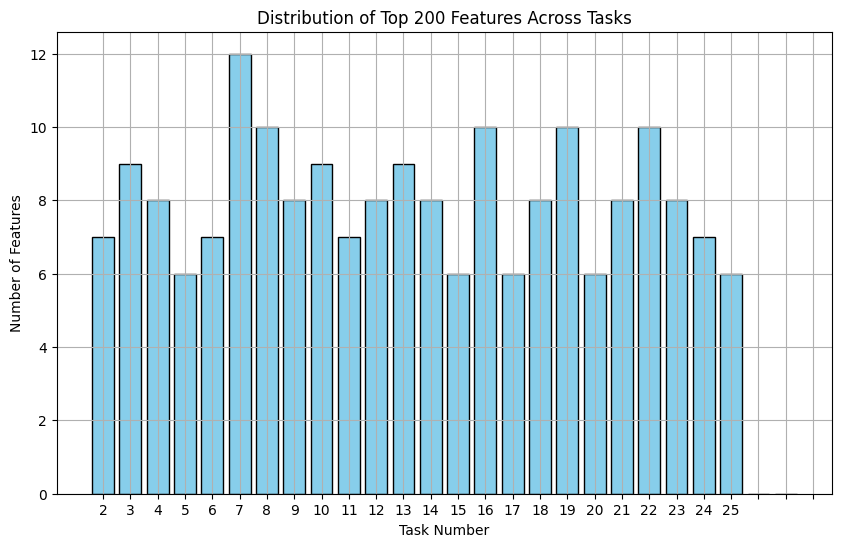

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees classifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE)
# Select the top 200 features
rfe = RFE(classifier, n_features_to_select=200)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 28) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 28))
plt.title('Distribution of Top 200 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


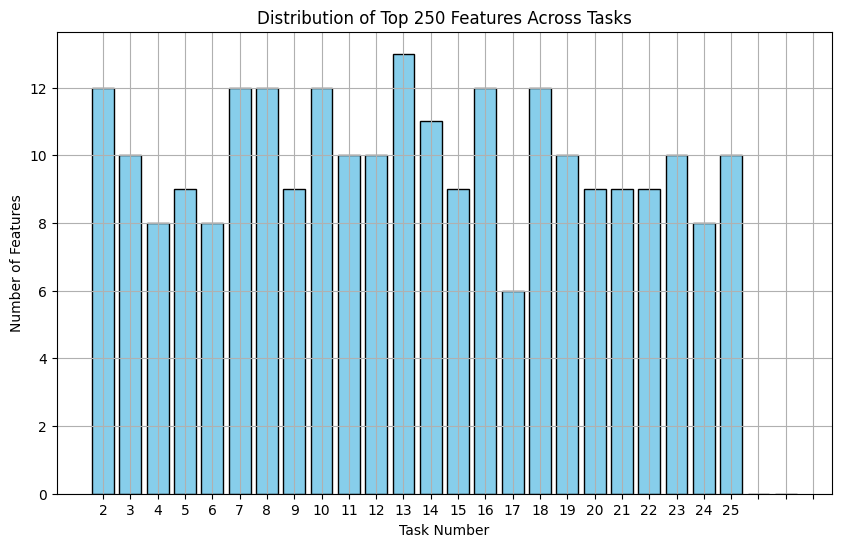

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE)
# Select the top 250 features
rfe = RFE(classifier, n_features_to_select=250)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 28) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 28))
plt.title('Distribution of Top 250 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


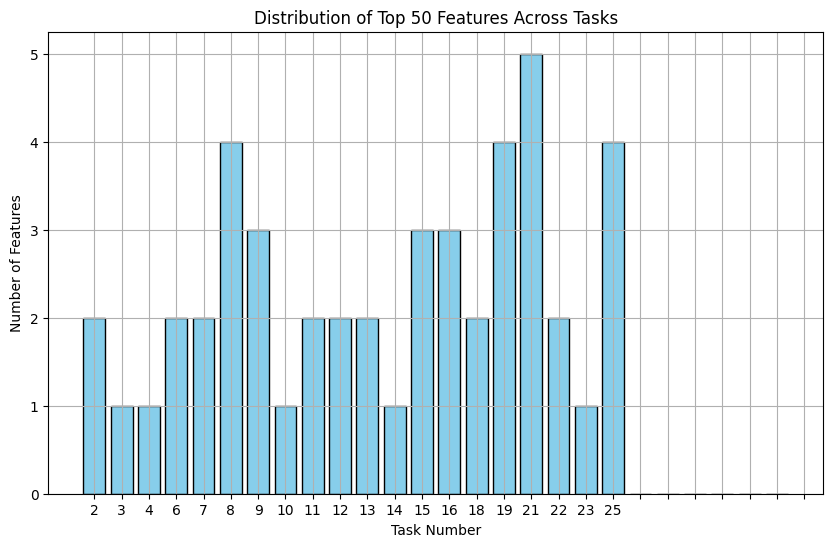

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
classifier = LogisticRegression(random_state=42)

# Initialize Recursive Feature Elimination (RFE)
# Select the top 200 features
rfe = RFE(classifier, n_features_to_select=50)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 28) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 28))
plt.title('Distribution of Top 50 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


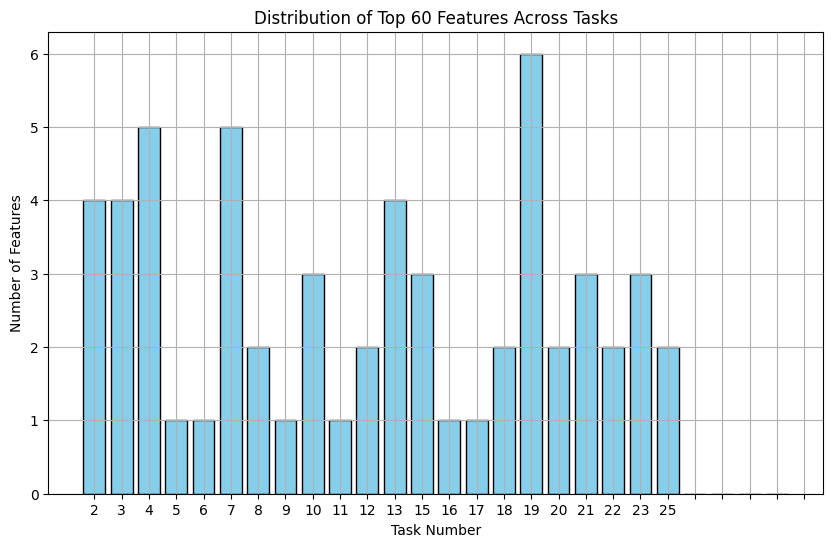

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
classifier = XGBClassifier(random_state=42)

# Initialize Recursive Feature Elimination (RFE)
# Select the top 200 features
rfe = RFE(classifier, n_features_to_select=60)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 28) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 28))
plt.title('Distribution of Top 60 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


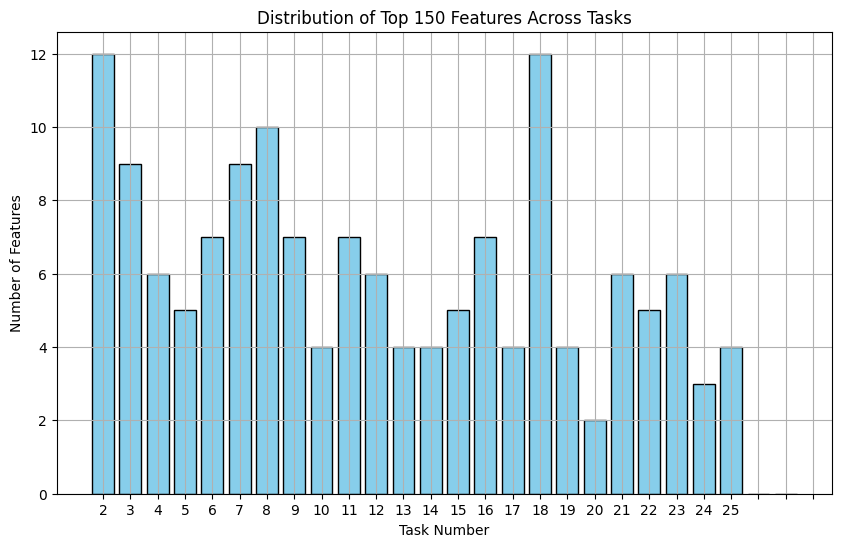

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
classifier = SVC(random_state=42)

# Perform ANOVA for feature selection
# Select the top 200 features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=150)
X_train_selected = k_best.fit_transform(X_train, y_train)
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 28) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 28))
plt.title('Distribution of Top 150 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


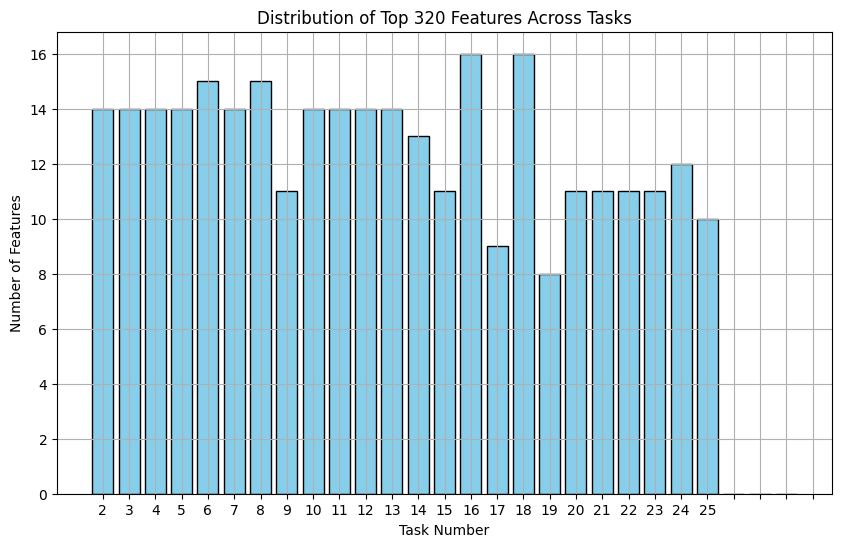

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Perform ANOVA for feature selection
# Select the top 200 features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=320)
X_train_selected = k_best.fit_transform(X_train, y_train)
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 29) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 29))
plt.title('Distribution of Top 320 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


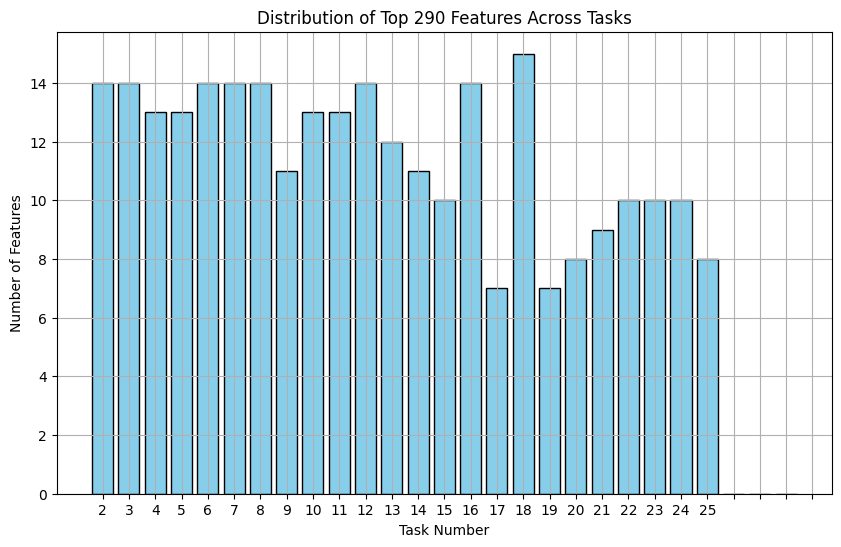

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP classifier
classifier = MLPClassifier(random_state=42)

# Perform ANOVA for feature selection
# Select the top 200 features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=290)
X_train_selected = k_best.fit_transform(X_train, y_train)
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})

# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].hist(bins=np.arange(1, 29) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(1, 29))
plt.title('Distribution of Top 290 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()


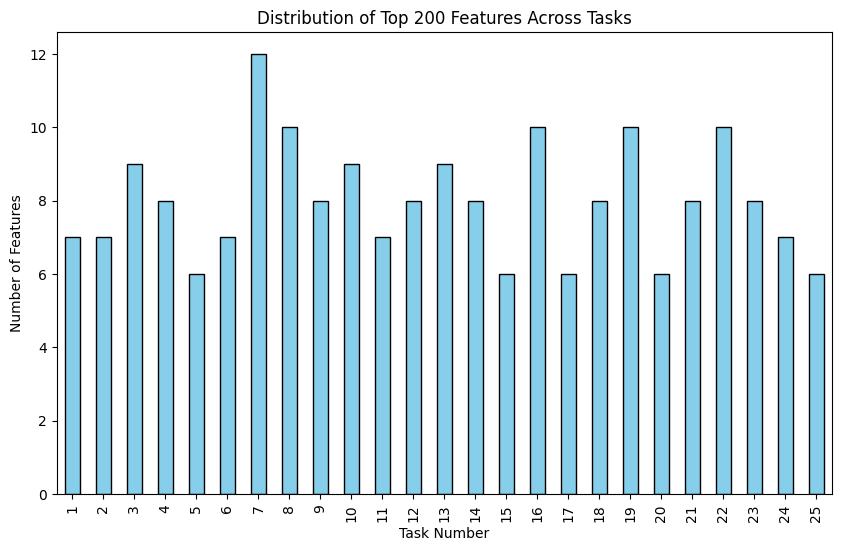

In [ ]:
####### Fig 6 main text

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/data_null_outlier_free_normalized_corr_90.csv'
df = pd.read_csv(file_path)

# Assuming the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode class labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees classifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE)
# Select the top 200 features
rfe = RFE(classifier, n_features_to_select=200)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Create a DataFrame with selected features and associated task numbers
feature_task_df = pd.DataFrame({'Feature': selected_features})
# Extract the task numbers from the feature names
feature_task_df['Task'] = feature_task_df['Feature'].str.extract(r'(\d{1,2})$')

# Replace NaN (for features without a task number) with a default value or drop those rows
feature_task_df['Task'].fillna('NoTask', inplace=True)

# Sort the task numbers for sequential order
feature_task_df['Task'] = feature_task_df['Task'].astype(int)
feature_task_df.sort_values(by='Task', inplace=True)

# Store the feature-task mapping in a CSV file
feature_task_df.to_csv('feature_task_mapping.csv', index=False)

# Plot the distribution of features across tasks
plt.figure(figsize=(10, 6))
feature_task_df['Task'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Top 200 Features Across Tasks')
plt.xlabel('Task Number')
plt.ylabel('Number of Features')
plt.show()
